# WeatherPy 

# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
urlx = 'api.openweathermap.org'
query_urlx = f"http://{urlx}/data/2.5/weather?appid={weather_api_key}&units=metric&q="
cityx = "London"
cityx_url = f'{query_urlx}{cityx}'
cityx_weather = requests.get(cityx_url).json()
cityx_weather

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 9.69,
  'feels_like': 7.57,
  'temp_min': 8.64,
  'temp_max': 10.71,
  'pressure': 1016,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 330},
 'clouds': {'all': 100},
 'dt': 1700546599,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1700551684,
  'sunset': 1700582689},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
# Set the API base URL
url = 'api.openweathermap.org'
query_url = f"http://{url}/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}{city}'
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | waitara
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | tamanrasset
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | cervantes
Processing Record 13 of Set 1 | kayangel
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | montepuez
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | calabozo
Processing Record 20 of Set 1 | chul'man
Processing Record 21 of Set 1 | waingapu
Processing Record 22 of Set 1 | hermanus
Processing Record 23 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.23,86,30,1.34,NZ,1700546925
1,adamstown,-25.0660,-130.1015,20.53,83,100,3.52,PN,1700546924
2,fort bragg,35.1390,-79.0060,13.32,69,100,4.12,US,1700546958
3,waitara,-38.9250,174.2500,16.11,72,6,5.43,NZ,1700547166
4,puerto natales,-51.7236,-72.4875,2.12,96,100,2.83,CL,1700546922


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,86,30,1.34,NZ,1700546925
1,adamstown,-25.0660,-130.1015,20.53,83,100,3.52,PN,1700546924
2,fort bragg,35.1390,-79.0060,13.32,69,100,4.12,US,1700546958
3,waitara,-38.9250,174.2500,16.11,72,6,5.43,NZ,1700547166
4,puerto natales,-51.7236,-72.4875,2.12,96,100,2.83,CL,1700546922


## Create the Scatter Plots Requested

### Latitude Vs. Temperature 

In [9]:
date_datapull = datetime.date.today().strftime('%Y-%m-%d')
date_datapull

'2023-11-20'

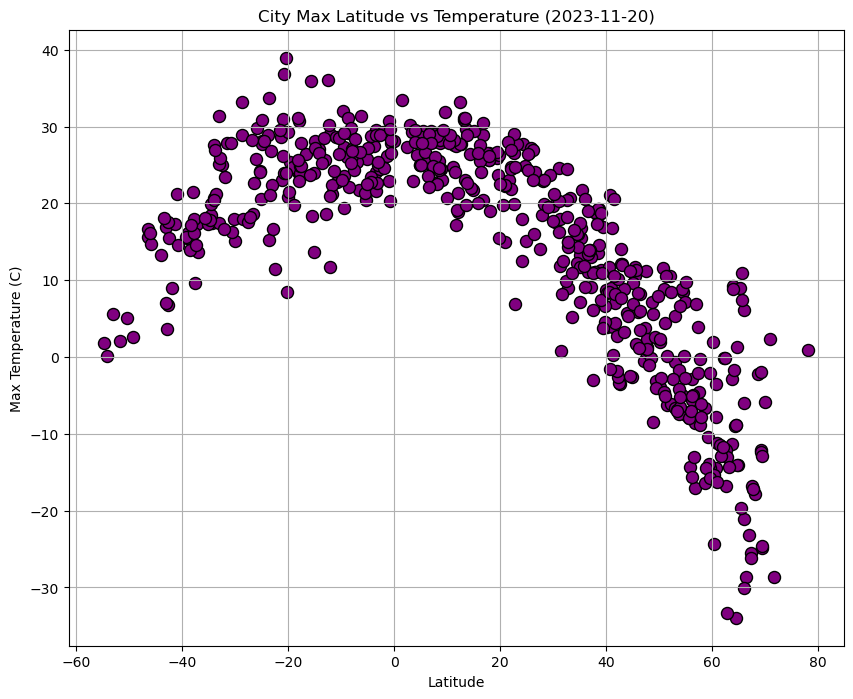

In [10]:
# Build scatter plot for latitude vs. temperature
x_lat_scatter = [city_data_df['Lat']]
y_temp_scatter = [city_data_df['Max Temp']]

plt.figure(figsize = (10,8))
plt.scatter(x_lat_scatter, y_temp_scatter, marker="o", facecolors="purple", edgecolor="black",s =75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature ({date_datapull})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs.Humidity

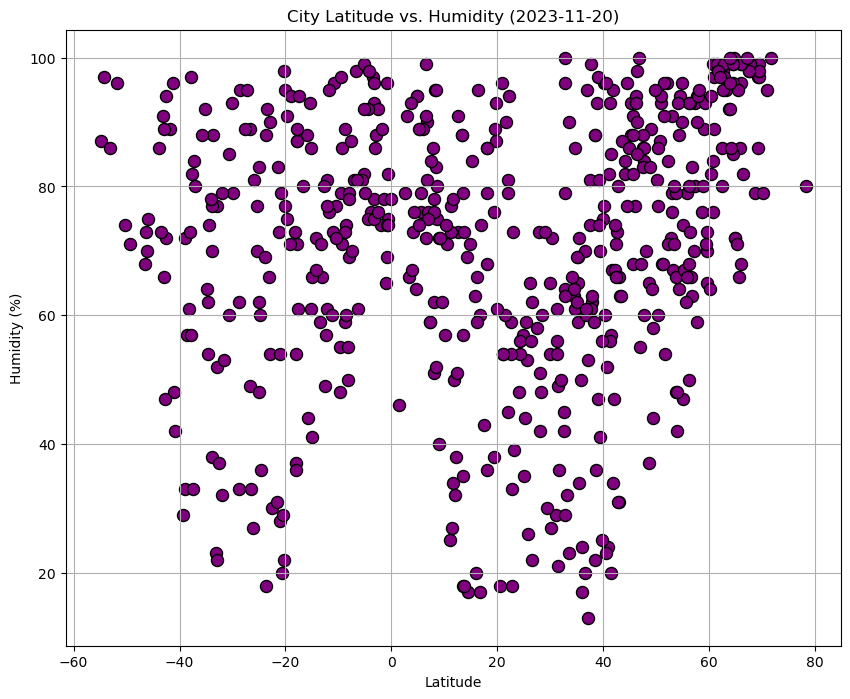

In [11]:
# Build the scatter plots for latitude vs. humidity
y_humid_scatter = [city_data_df['Humidity']]

plt.figure(figsize = (10,8))
plt.scatter(x_lat_scatter, y_humid_scatter, marker="o", facecolors="purple", edgecolors="black",s =75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date_datapull})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

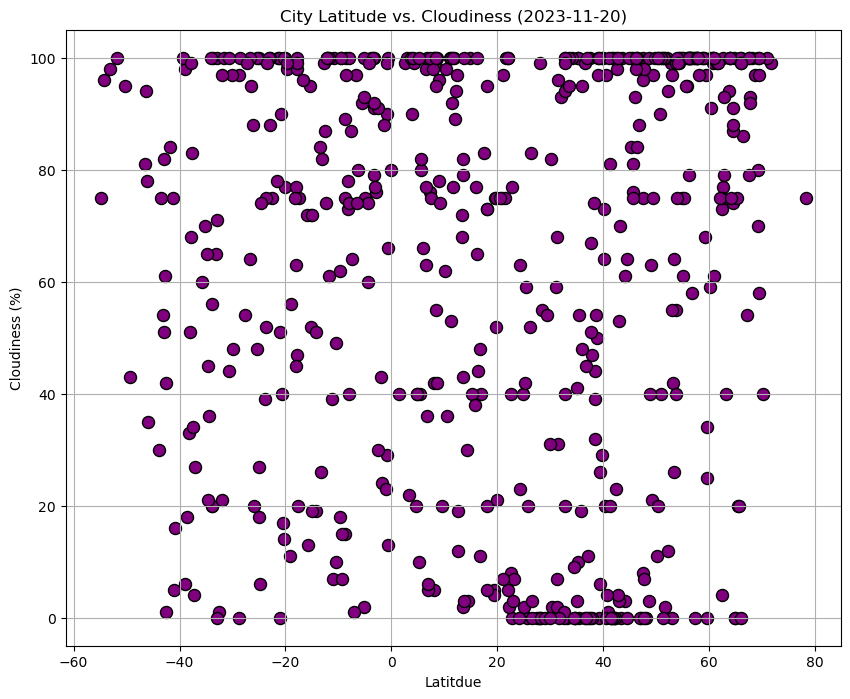

In [12]:
# Build the scatter plots for latitude vs. cloudiness
y_cloud_scatter = [city_data_df['Cloudiness']]

plt.figure(figsize = (10,8))
plt.scatter(x_lat_scatter, y_cloud_scatter, marker="o", facecolors="purple", edgecolors="black",s =75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date_datapull})")
plt.xlabel("Latitdue")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

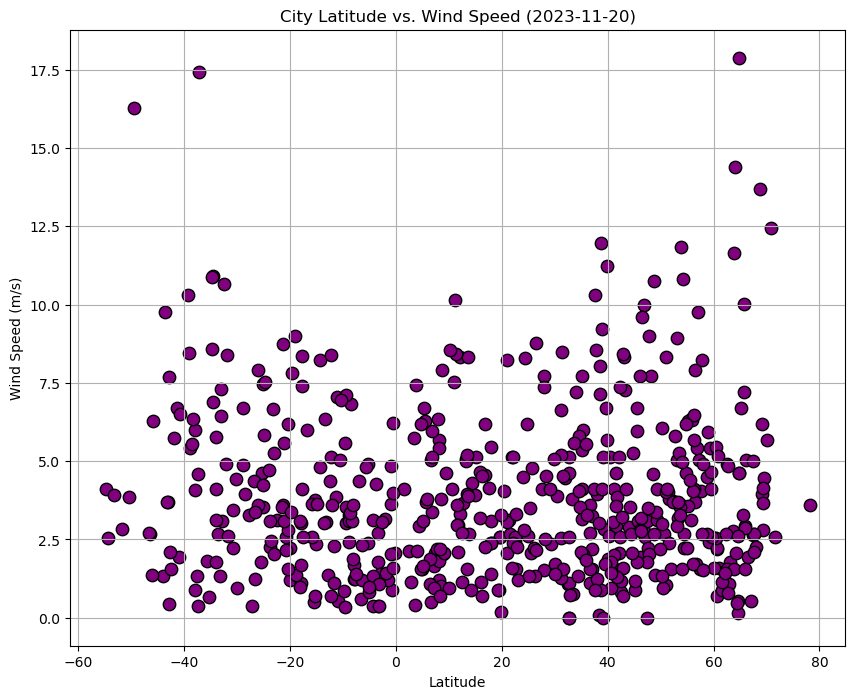

In [13]:
# Build the scatter plots for latitude vs. wind speed
y_wind_scatter = [city_data_df['Wind Speed']]

plt.figure(figsize = (10,8))
plt.scatter(x_lat_scatter, y_wind_scatter, marker="o", facecolors="purple", edgecolors="black",s =80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date_datapull})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# Define a function to create Linear Regression plots
df = city_data_df

def LRPlots():
    x_data = df[x_param]
    y_data = df[y_param]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize = (10,8))
    plt.scatter(x_data, y_data, marker="o", facecolors='lightblue', edgecolors='mediumblue', s =80)
    
    annotate_x = min(x_data)+0.1*max(x_data)
    annotate_y = max(y_data)-0.1*max(y_data)
    
    plt.plot(x_data,regress_values,"darkgray")
    plt.annotate(f'{line_eq} r={round(rvalue,2)}',(annotate_x,annotate_y),fontsize=20,color="black")
    
    plt.xlabel("Latitdue")
    plt.ylabel("Max Temp")
    plt.grid()
    
    print(f'The r-value is {round(rvalue,2)}')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fort bragg,35.1390,-79.0060,13.32,69,100,4.12,US,1700546958
6,aasiaat,68.7098,-52.8699,-2.22,79,97,13.68,GL,1700546936
7,iqaluit,63.7506,-68.5145,-11.31,92,94,2.77,CA,1700546919
8,thompson,55.7435,-97.8558,-7.22,79,100,6.33,CA,1700546946
9,tamanrasset,22.7850,5.5228,6.95,33,0,1.54,DZ,1700547167


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,86,30,1.34,NZ,1700546925
1,adamstown,-25.0660,-130.1015,20.53,83,100,3.52,PN,1700546924
3,waitara,-38.9250,174.2500,16.11,72,6,5.43,NZ,1700547166
4,puerto natales,-51.7236,-72.4875,2.12,96,100,2.83,CL,1700546922
5,touros,-5.1989,-35.4608,25.80,82,2,4.92,BR,1700546988


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.89


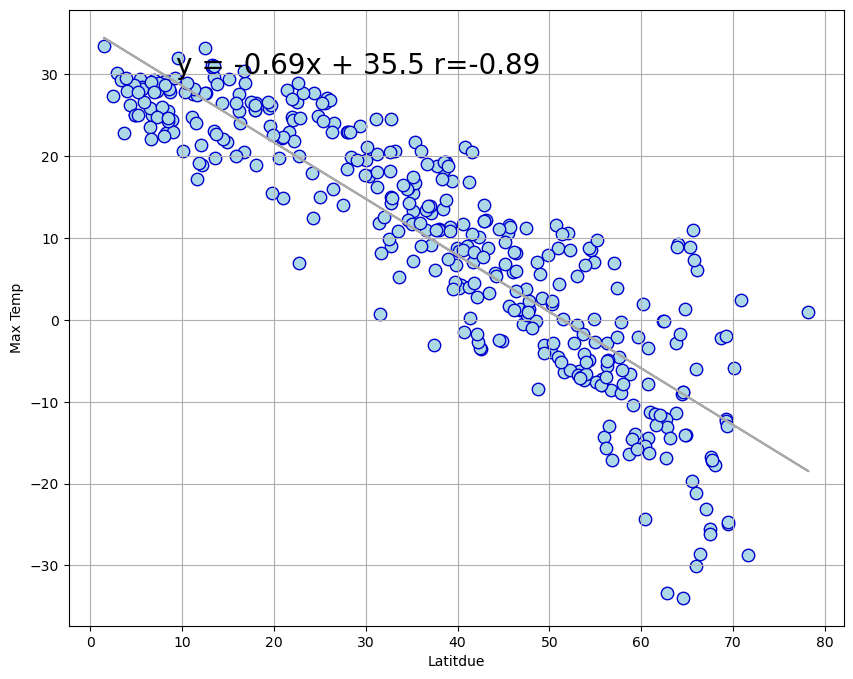

In [17]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
datasetID = 'North'
x_param = 'Lat'
y_param = "Max Temp"

LRPlots()

The r-value is 0.64


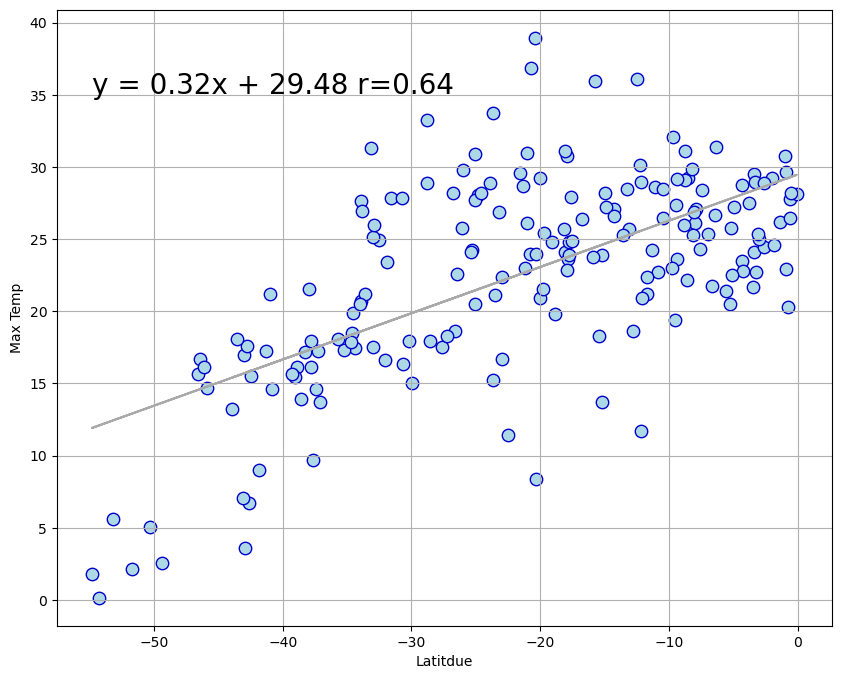

In [18]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
datasetID = 'South'
x_param = 'Lat'
y_param = 'Max Temp'

LRPlots()

Discussion about the linear relationship: In the northern hemisphere, there appears to be strong negative correlation of r = -0.88 between the latitude and maximum temperature. Whereas in the southern hemisphere, there exists a moderate correlation of r = 0.59 between latitude and maximum temperature. Theres a very similar aspect in that for both temperatures, as the temperature increases as we approach the equator, where latitude is 0.

## Humidity vs. Latitude Linear Regression Plot

The r-value is 0.34


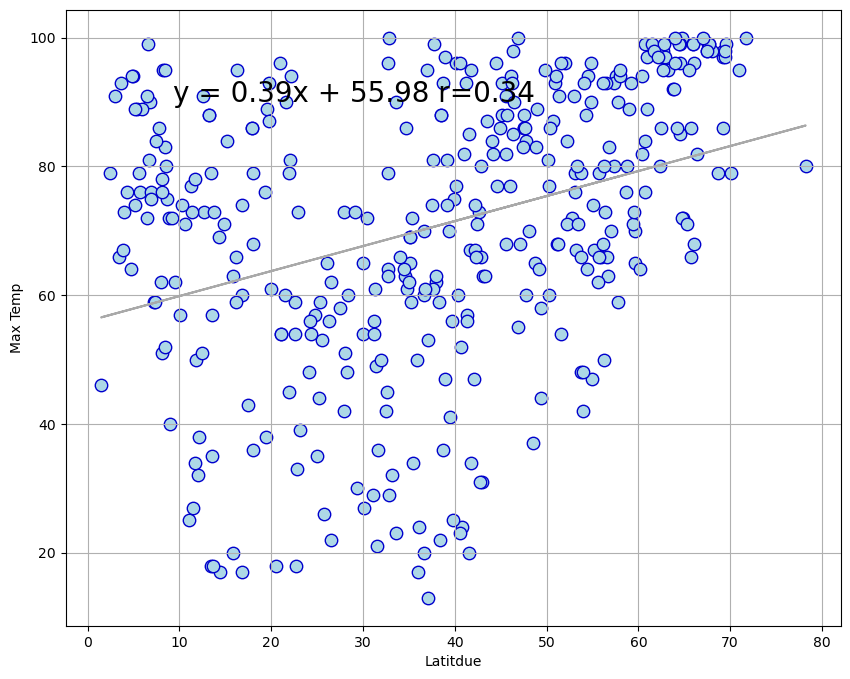

In [19]:
# Northern Hemisphere
df = northern_hemi_df
datasetID = 'North'
x_param = 'Lat'
y_param = 'Humidity'

LRPlots()

The r-value is 0.14


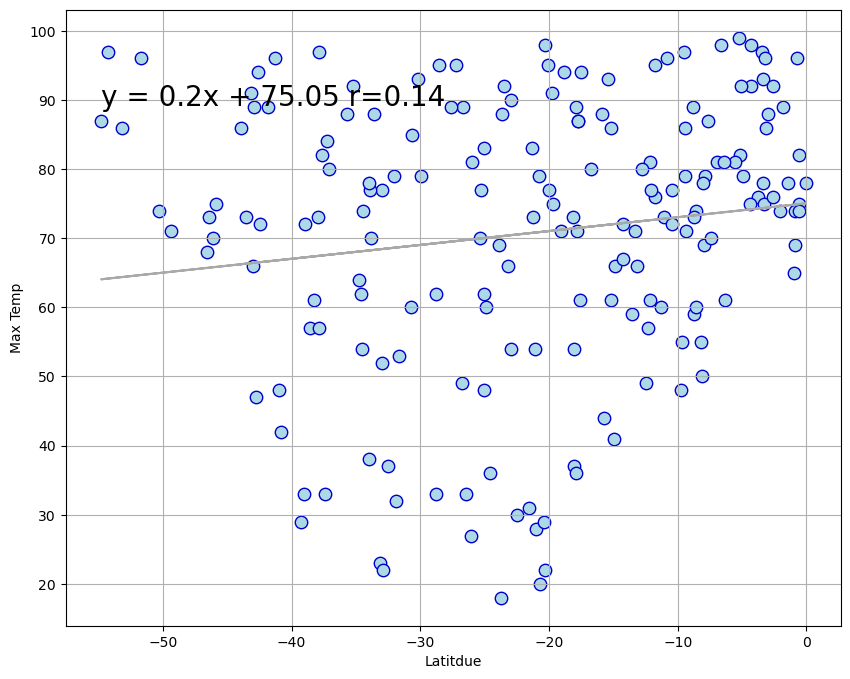

In [20]:
# Southern Hemisphere
df = southern_hemi_df
datasetID = 'South'
x_param = 'Lat'
y_param = 'Humidity'

LRPlots()

Discussion about the linear relationship: In the northern hemisphere, there appears to be a weak correlation of r = -0.24 between the latitude and humidity. Similarily, there exists a weak correlation of r = -0.32 between latitude and humidity. It varies greatly across latitudes in both noted hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.18


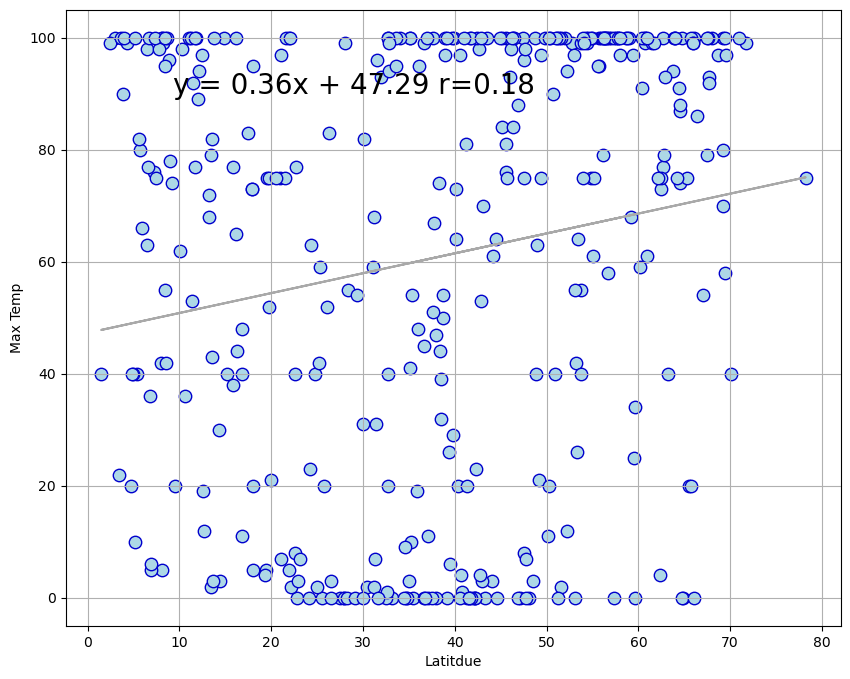

In [21]:
# Northern Hemisphere
df = northern_hemi_df
datasetID = 'North'
x_param = 'Lat'
y_param = 'Cloudiness'

LRPlots()

The r-value is 0.09


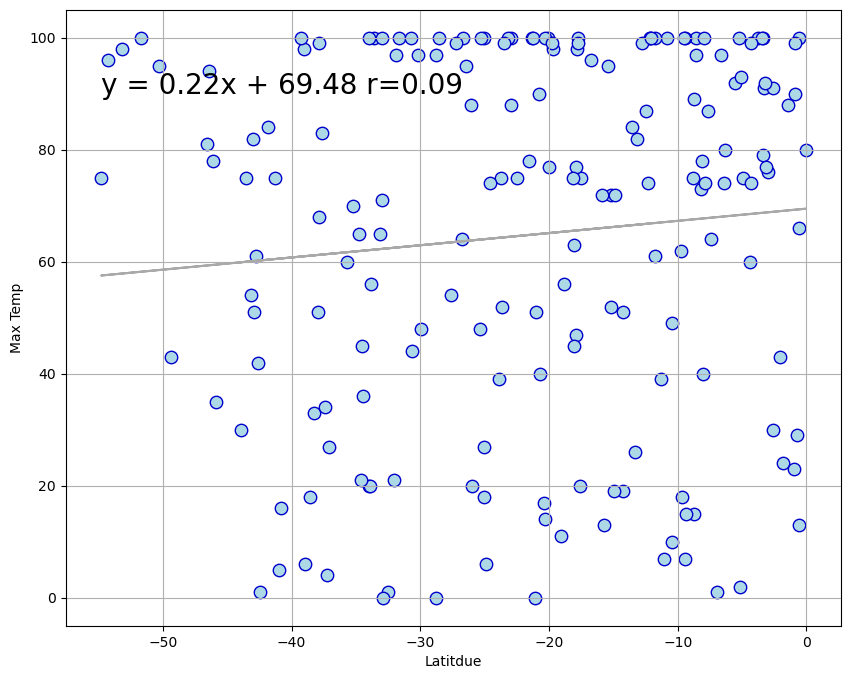

In [22]:
# Southern Hemisphere
df = southern_hemi_df
datasetID = 'South'
x_param = 'Lat'
y_param = 'Cloudiness'

LRPlots()

Discussion about the relationship: Weak correlations appear for both northern and southern hemispheres, r= 0.11 and r= 0.03 respectively between latitude and cloudiness. Wide range of variance for both hemispheres exists.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.1


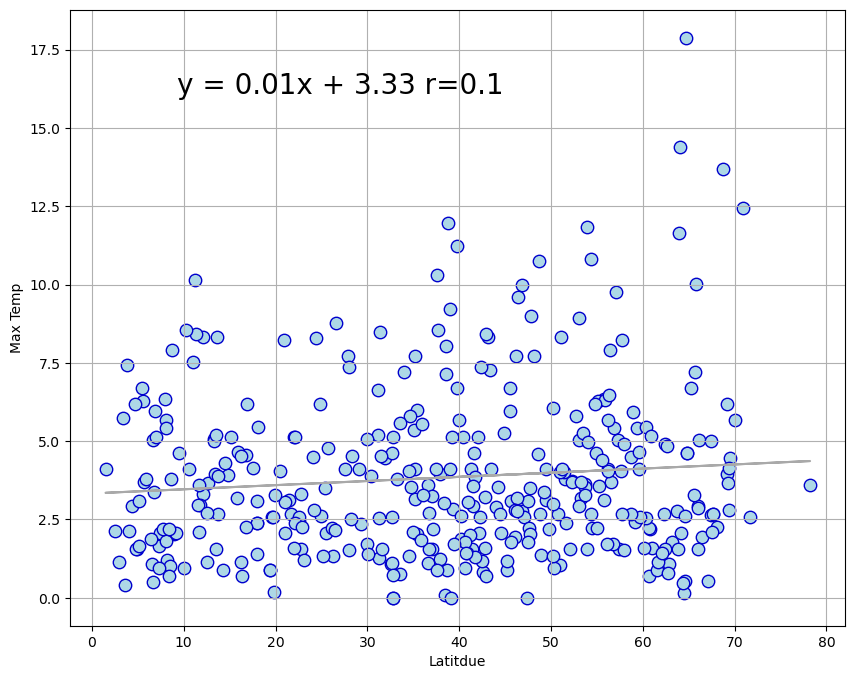

In [23]:
# Northern Hemisphere
df = northern_hemi_df
datasetID = 'North'
x_param = 'Lat'
y_param = 'Wind Speed'

LRPlots()

The r-value is -0.3


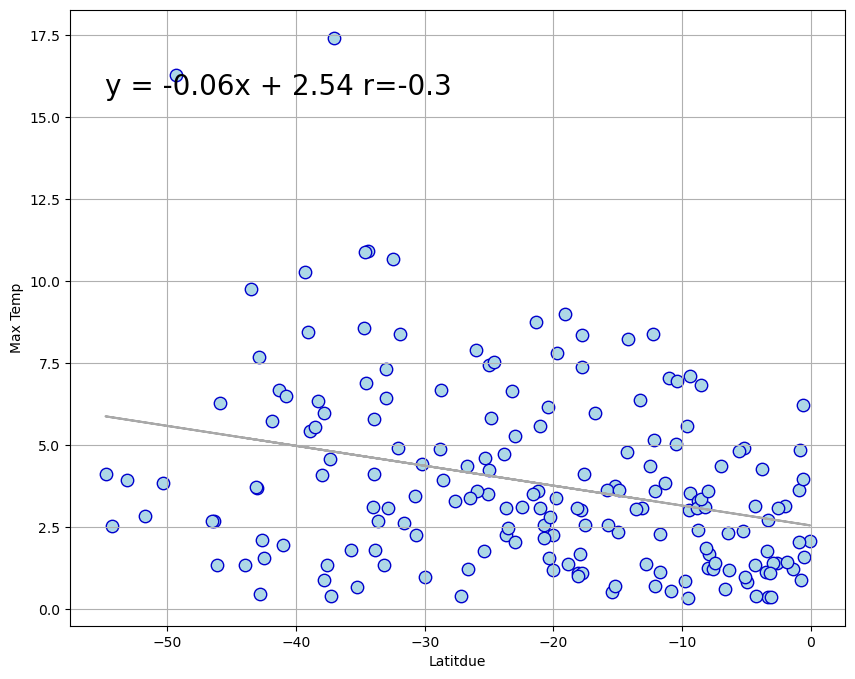

In [24]:
# Southern Hemisphere
df = southern_hemi_df
datasetID = 'South'
x_param = 'Lat'
y_param = 'Wind Speed'

LRPlots()

Discussion about the linear relationship: In the northern hemisphere, there appears to be weak correlations of r = 0.17 between latitude and wind speed. The same can be said about the relationship of latitude and windspeed in the southern hemisphere, with a correlation of r = -0.26. There is noticeable decrease of average wind speed as you approach the equator. 